In [1]:
import pandas as pd

In [2]:
import os
os.getcwd()

'C:\\Users\\badgu\\OneDrive\\Desktop\\healthcare-no-show-analysis'

In [3]:
import os
os.listdir()

['.ipynb_checkpoints', 'data', 'Healthcare_No_Show_Analysis.ipynb']

In [4]:
os.listdir("data")

['appointments_raw.csv']

In [5]:
os.listdir("data")

['appointments_raw.csv']

In [6]:
import pandas as pd

df = pd.read_csv("data/appointments_raw.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.shape

(110527, 14)

In [8]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
df['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

In [11]:
df['No-show'].value_counts(normalize=True) * 100

No-show
No     79.806744
Yes    20.193256
Name: proportion, dtype: float64

In [12]:
df['Age'].min(), df['Age'].max()

(-1, 115)

In [13]:
df.columns = df.columns.str.lower().str.replace('-','_')

df.rename(columns={
    'hipertension':'hypertension',
    'handcap':'handicap'
}, inplace=True)

df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [14]:
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   appointmentid   110527 non-null  int64              
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hypertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handicap        110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

In [15]:
df['lead_time_days'] = (df['appointmentday'] - df['scheduledday']).dt.days

df['lead_time_days'].describe()

count    110527.000000
mean          9.183702
std          15.254996
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: lead_time_days, dtype: float64

In [16]:
df['scheduled_date'] = df['scheduledday'].dt.date
df['appointment_date'] = df['appointmentday'].dt.date

df['lead_time_days'] = (
    pd.to_datetime(df['appointment_date']) - 
    pd.to_datetime(df['scheduled_date'])
).dt.days

df['lead_time_days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: lead_time_days, dtype: float64

In [17]:
# Check how many negative lead times
df[df['lead_time_days'] < 0].shape

(5, 17)

In [18]:
# Remove negative lead time rows
df = df[df['lead_time_days'] >= 0]

df['lead_time_days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: lead_time_days, dtype: float64

In [19]:
df['age'].describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [20]:
df[df['age'] < 0].shape

(1, 17)

In [21]:
df = df[df['age'] >= 0]

df['age'].min(), df['age'].max()

(0, 115)

In [22]:
df['no_show_flag'] = df['no_show'].map({'No': 0, 'Yes': 1})

df[['no_show', 'no_show_flag']].head()

,no_show,no_show_flag
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0


In [23]:
df.groupby('no_show_flag')['lead_time_days'].mean()

no_show_flag
0     8.754759
1    15.835484
Name: lead_time_days, dtype: float64

In [24]:
import numpy as np

df['lead_time_bucket'] = pd.cut(
    df['lead_time_days'],
    bins=[-1, 1, 7, 14, 30, 180],
    labels=['0-1 days', '2-7 days', '8-14 days', '15-30 days', '30+ days']
)

df.groupby('lead_time_bucket')['no_show_flag'].mean() * 100

C:\Users\badgu\AppData\Local\Temp\ipykernel_5236\1950540947.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('lead_time_bucket')['no_show_flag'].mean() * 100


lead_time_bucket
0-1 days       6.636208
2-7 days      24.688566
8-14 days     30.469854
15-30 days    32.588797
30+ days      33.002505
Name: no_show_flag, dtype: float64

In [25]:
df.groupby('sms_received')['no_show_flag'].mean() * 100

sms_received
0    16.697984
1    27.574545
Name: no_show_flag, dtype: float64

In [26]:
df.groupby(['lead_time_bucket', 'sms_received'])['no_show_flag'].mean() * 100

C:\Users\badgu\AppData\Local\Temp\ipykernel_5236\4086988147.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['lead_time_bucket', 'sms_received'])['no_show_flag'].mean() * 100


lead_time_bucket  sms_received
0-1 days          0                6.636208
                  1                     NaN
2-7 days          0               25.382521
                  1               23.761690
8-14 days         0               33.758215
                  1               28.112507
15-30 days        0               36.870530
                  1               29.800380
30+ days          0               37.525202
                  1               30.202808
Name: no_show_flag, dtype: float64

In [27]:
df.groupby(pd.cut(df['age'], bins=[0,18,35,55,75,120]))['no_show_flag'].mean() * 100

C:\Users\badgu\AppData\Local\Temp\ipykernel_5236\816381616.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['age'], bins=[0,18,35,55,75,120]))['no_show_flag'].mean() * 100


age
(0, 18]      22.534155
(18, 35]     23.828465
(35, 55]     19.704844
(55, 75]     15.525507
(75, 120]    16.119458
Name: no_show_flag, dtype: float64

In [28]:
df.groupby('hypertension')['no_show_flag'].mean() * 100

hypertension
0    20.899459
1    17.301959
Name: no_show_flag, dtype: float64

In [58]:
df.groupby('diabetes')['no_show_flag'].mean() * 100

diabetes
0    20.359141
1    18.003273
Name: no_show_flag, dtype: float64

In [60]:
df[['age', 'lead_time_days', 'hypertension', 'diabetes', 'sms_received', 'no_show_flag']].corr()

,age,lead_time_days,hypertension,diabetes,sms_received,no_show_flag
age,1.000000,0.034813,0.504599,0.292398,0.012629,-0.060320
lead_time_days,0.034813,1.000000,-0.017236,-0.027200,0.398128,0.186320
hypertension,0.504599,-0.017236,1.000000,0.433082,-0.006285,-0.035662
diabetes,0.292398,-0.027200,0.433082,1.000000,-0.014561,-0.015158
sms_received,0.012629,0.398128,-0.006285,-0.014561,1.000000,0.126502
no_show_flag,-0.060320,0.186320,-0.035662,-0.015158,0.126502,1.000000


In [62]:
df['high_risk_flag'] = (
    (df['lead_time_days'] > 14) &
    (df['age'] < 35) &
    (df['hypertension'] == 0) &
    (df['diabetes'] == 0)
).astype(int)

df.groupby('high_risk_flag')['no_show_flag'].mean() * 100

high_risk_flag
0    17.873496
1    37.724876
Name: no_show_flag, dtype: float64

In [64]:
import matplotlib.pyplot as plt

C:\Users\badgu\AppData\Local\Temp\ipykernel_5236\1454737121.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_plot = df.groupby('lead_time_bucket')['no_show_flag'].mean() * 100


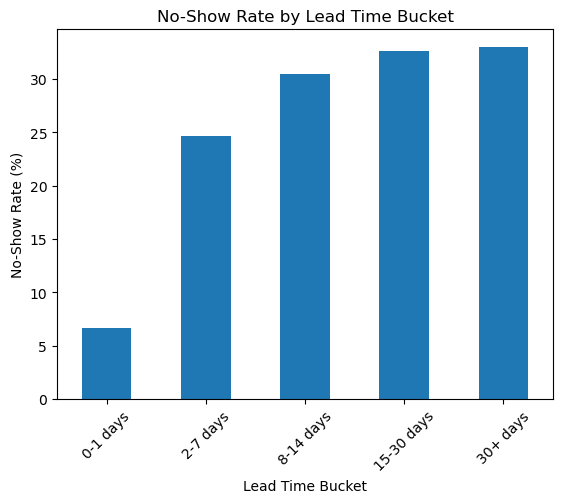

In [66]:
lead_time_plot = df.groupby('lead_time_bucket')['no_show_flag'].mean() * 100

plt.figure()
lead_time_plot.plot(kind='bar')
plt.title('No-Show Rate by Lead Time Bucket')
plt.xlabel('Lead Time Bucket')
plt.ylabel('No-Show Rate (%)')
plt.xticks(rotation=45)
plt.show()

C:\Users\badgu\AppData\Local\Temp\ipykernel_5236\1505025444.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_plot = df.groupby(


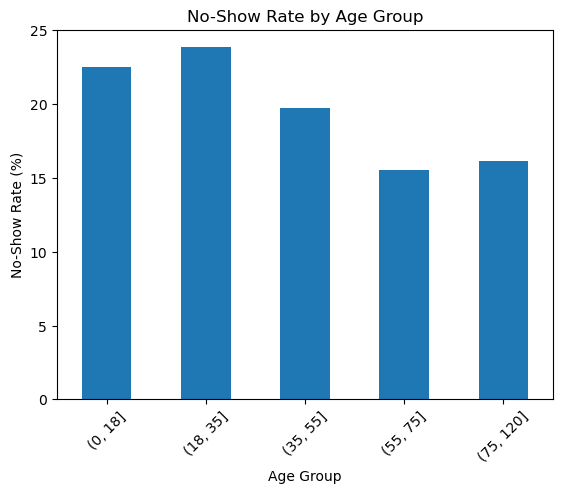

In [68]:
age_plot = df.groupby(
    pd.cut(df['age'], bins=[0,18,35,55,75,120])
)['no_show_flag'].mean() * 100

plt.figure()
age_plot.plot(kind='bar')
plt.title('No-Show Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No-Show Rate (%)')
plt.xticks(rotation=45)
plt.show()

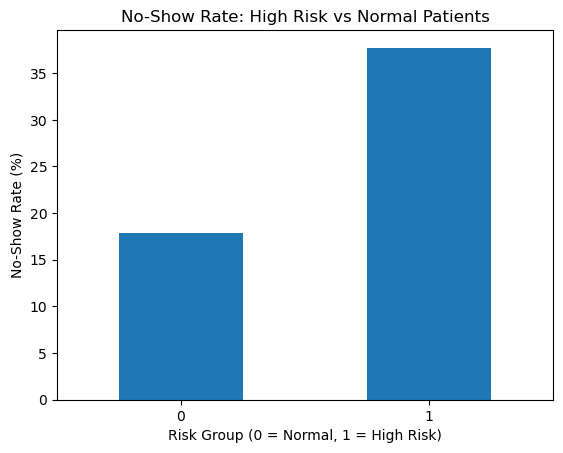

In [70]:
risk_plot = df.groupby('high_risk_flag')['no_show_flag'].mean() * 100

plt.figure()
risk_plot.plot(kind='bar')
plt.title('No-Show Rate: High Risk vs Normal Patients')
plt.xlabel('Risk Group (0 = Normal, 1 = High Risk)')
plt.ylabel('No-Show Rate (%)')
plt.xticks(rotation=0)
plt.show()

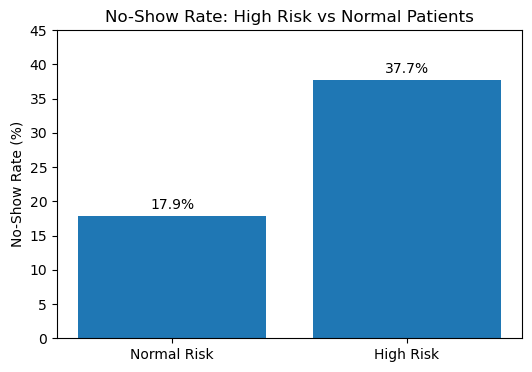

In [72]:
risk_plot = df.groupby('high_risk_flag')['no_show_flag'].mean() * 100

plt.figure(figsize=(6,4))
bars = plt.bar(['Normal Risk', 'High Risk'], risk_plot)

plt.title('No-Show Rate: High Risk vs Normal Patients')
plt.ylabel('No-Show Rate (%)')
plt.ylim(0, 45)

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f'{height:.1f}%', ha='center')

plt.show()

# Reducing Patient No-Show Rates (Multi-Specialty Hospital)

## Executive Summary
**Problem:** ~20% of appointments result in no-shows, reducing provider utilization and disrupting scheduling.  
**Key Findings:**
- No-show risk rises sharply with lead time: **6.6% (0–1 days)** → **33.0% (30+ days)**.
- Younger patients (**18–35**) show higher no-show rates (~**23.8%**) vs older cohorts (~**15–16%**).
- SMS reminders appear higher-risk in aggregate, but **reduce no-shows by ~6–7 pts** for long lead-time bookings (15+ days).
- A simple rule-based risk segment flags a cohort with **~37.7%** no-show rate vs **~17.9%** baseline.

**Recommendation:** Prioritize intervention for long lead-time + younger + non-chronic patients using reminder escalation and confirmation workflows.

## Data & Cleaning
**Dataset:** Appointment scheduling records (110k+ rows).  
**Cleaning highlights:**
- Standardized column names.
- Converted appointment/scheduled dates to datetime.
- Engineered `lead_time_days` and removed logically invalid negative lead times.
- Removed invalid ages (age < 0).
- Created `no_show_flag` (1 = no-show, 0 = showed).

## Analysis & Visuals
The following visuals highlight primary no-show drivers and an actionable high-risk segment.

In [77]:
import os

# Create cleaned folder if it doesn't exist
os.makedirs("data/cleaned", exist_ok=True)

# Save cleaned dataset
df.to_csv("data/cleaned/appointments_cleaned.csv", index=False)

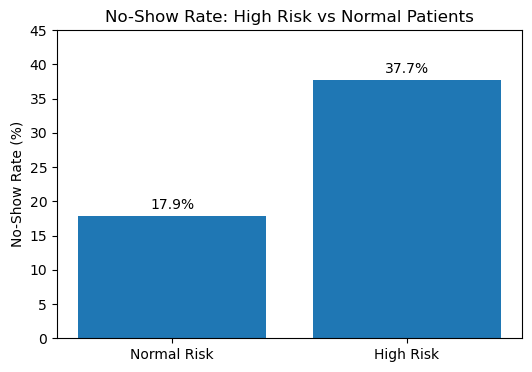

In [79]:
os.makedirs("images", exist_ok=True)

risk_plot = df.groupby('high_risk_flag')['no_show_flag'].mean() * 100

plt.figure(figsize=(6,4))
bars = plt.bar(['Normal Risk', 'High Risk'], risk_plot)

plt.title('No-Show Rate: High Risk vs Normal Patients')
plt.ylabel('No-Show Rate (%)')
plt.ylim(0, 45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f'{height:.1f}%', ha='center')

plt.savefig("images/high_risk_vs_normal.png", bbox_inches='tight')
plt.show()